# KPMG Virtual Internship

# Sprocket Central Pty Ltd Data Set

# Problem Statement

Your task is to take a look at the following datasets provided by Sprocket Central Pty Ltd and identify all data quality issues. Once you've had a look at these datasets, draft an email to the client identifying all data quality issues. 		


In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.ExcelFile('KPMG.xlsx')

In [3]:
# in the excel file there are 4 sheets 
# reading the each files seperately

transactions = pd.read_excel(data, 'Transactions')
new_customer_list = pd.read_excel(data, 'NewCustomerList')
customer_demographic = pd.read_excel(data, 'CustomerDemographic')
customer_address = pd.read_excel(data, 'CustomerAddress')


# now we are going to explore the transactions dataset

In [4]:
# to get the dataset
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [5]:
# to get the first five rows
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
# to get the last five rows
transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


In [7]:
# to get the shape of the dataset
transactions.shape


(20000, 13)

In [8]:
# to get the info of the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# to get the statistical details
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [10]:
# to get the unique values
transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [11]:
# to get the feature names
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [12]:
# to get the types of the features
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [13]:
# to get the no.of.missing values in each columns (boolean format)
transactions.isnull()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# to get the no.of.missing values in each columns (numerical format)
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

It is clear that there are null values in the online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date columns.

we can drop those missing value rows or we can impute them with mean, median, mode.
we can also use fillna and simpleimputer function also.

In [15]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [16]:
# imputing the null values by using mode for the categorical values

transactions['brand'] = transactions['brand'].fillna(transactions['brand'].mode()[0])
transactions['product_line'] = transactions['product_line'].fillna(transactions['product_line'].mode()[0])
transactions['product_class'] = transactions['product_class'].fillna(transactions['product_class'].mode()[0])
transactions['product_size'] = transactions['product_size'].fillna(transactions['product_size'].mode()[0])
transactions['product_first_sold_date'] = transactions['product_first_sold_date'].fillna(transactions['product_first_sold_date'].mode()[0])

In [17]:
# imputing the null values by using median for the numerical values

transactions['online_order'] = transactions['online_order'].fillna(transactions['online_order'].median())
transactions['standard_cost'] = transactions['standard_cost'].fillna(transactions['standard_cost'].median())


In [18]:
# now check if there is any missing values after imputing
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

It is clear that we have no null values now. We have imputed the missing values.

In [19]:
# lets explore the value counts of the brand feature
transactions['brand'].value_counts()

Solex             4450
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [20]:
# lets explore the value counts of the product_line feature
transactions['product_line'].value_counts()

Standard    14373
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [21]:
# lets explore the value counts of the product_class feature
transactions['product_class'].value_counts()

medium    14023
high       3013
low        2964
Name: product_class, dtype: int64

In [22]:
# lets explore the value counts of the product_size feature
transactions['product_size'].value_counts()

medium    13187
large      3976
small      2837
Name: product_size, dtype: int64

In [23]:
# lets explore the value counts of the online_order feature
transactions['online_order'].value_counts()

1.0    10189
0.0     9811
Name: online_order, dtype: int64

In [24]:
# to check if our dataset got any duplicates
transactions.duplicated().sum()

0

In [25]:
# to grt the shape
transactions.shape

(20000, 13)

In [26]:
# if any duplicate data is found use this function to drop the duplicates
transactions.drop_duplicates(inplace = True)

In [27]:
# to cross check , use shape function
transactions.shape

(20000, 13)

It is clear that the shape of the dataset is same before and after using the drop_duplicates function.

To check if there is any outliers we can use the following methods
1) Box plot : Create a boxplot for each numerical column in your dataset. Boxplots provide a visual representation of the distribution of the data, allowing you to identify any potential outliers. Outliers are typically represented as points outside the whiskers of the boxplot.

2) Z-Score : Calculate the z-score for each data point in your dataset. The z-score measures the number of standard deviations an observation is from the mean. Points with a z-score above a certain threshold (e.g., 3 or -3) are often considered outliers.

3) IQR (Interquartile Range): Calculate the interquartile range (IQR) for each numerical column and identify points outside the range. The IQR is the range between the 25th and 75th percentiles of the data. Observations outside the range of 1.5 times the IQR are often considered outliers.


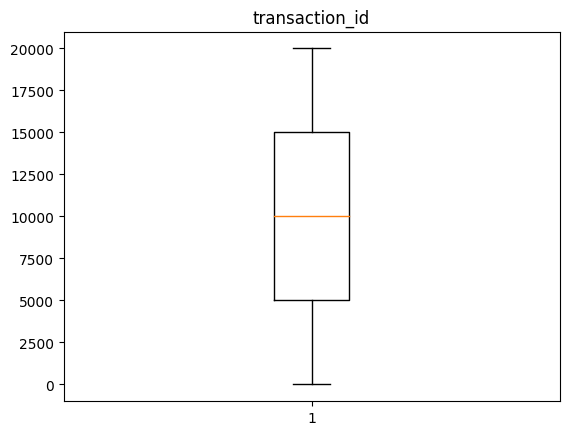

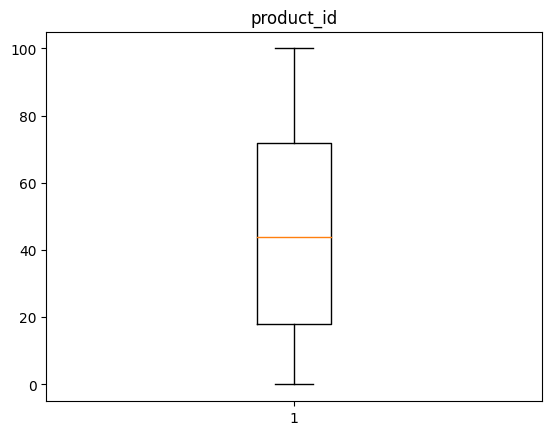

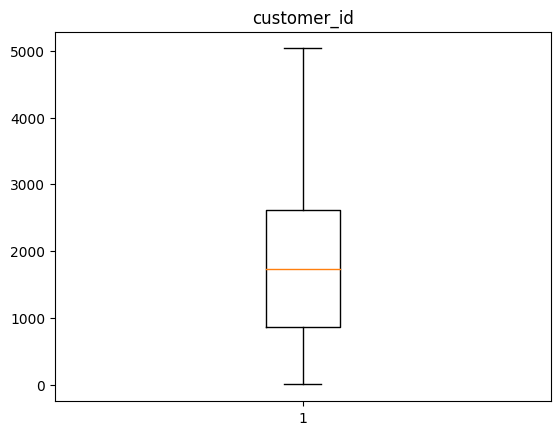

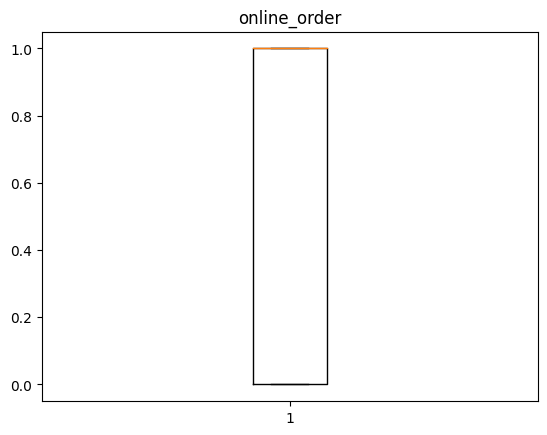

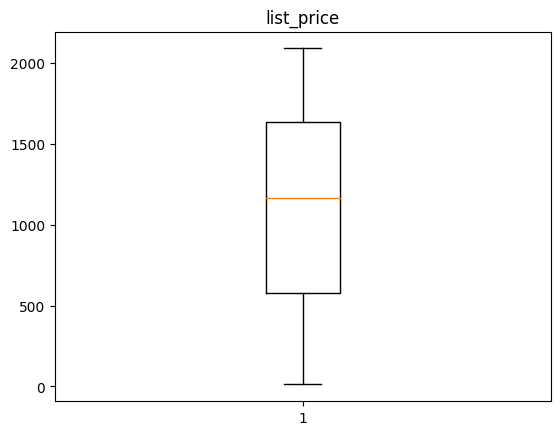

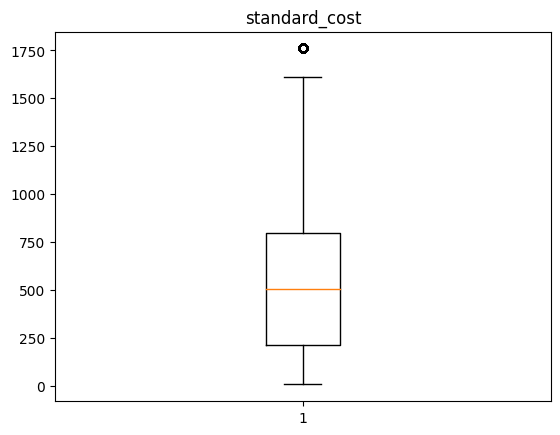

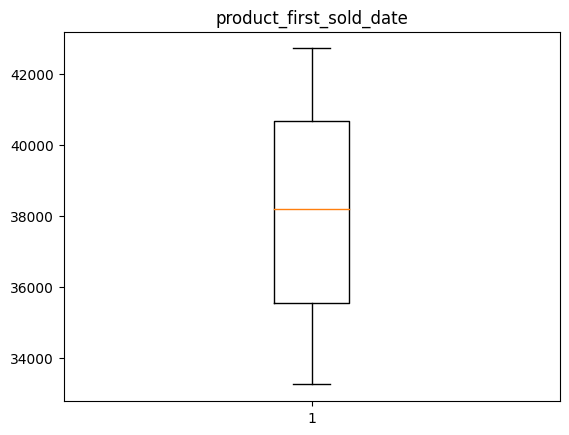

In [28]:
# using box plot to check the outliers
import matplotlib.pyplot as plt


numerical_columns = transactions.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure()
    plt.boxplot(transactions[column])
    plt.title(column)
    plt.show()


In [29]:
# Calculating z-score to find the outliers

from scipy import stats


numerical_columns = transactions.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    z_scores = np.abs(stats.zscore(transactions[column]))
    outliers = transactions[z_scores > 3]  # Set the z-score threshold as per your preference
    print(f"Outliers in {column}:\n{outliers}\n")


Outliers in transaction_id:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

Outliers in product_id:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

Outliers in customer_id:
       transaction_id  product_id  customer_id transaction_date  online_order  \
8707             8708           0         5034       2017-10-07           0.0   
16700           16701           0         5034       2017-01-27           0.0   
17468           17469           0         5034       2017-01-03           0.0   

      order_status           brand product_line product_class product_size  \
8707      Approved           Solex         Road        medium       

In [30]:
# Calculating IQR(Interquartile range) to find the outliers
 
numerical_columns = transactions.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    q1 = transactions[column].quantile(0.25)
    q3 = transactions[column].quantile(0.75)
    iqr = q3 - q1
    outliers = transactions[(transactions[column] < q1 - 1.5 * iqr) | (transactions[column] > q3 + 1.5 * iqr)]
    print(f"Outliers in {column}:\n{outliers}\n")


Outliers in transaction_id:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

Outliers in product_id:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

Outliers in customer_id:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []

Outliers in online_order:
Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Inde

# Handling Outliers

The following are the few common approaches to handle the outliers

1) Remove outliers: If the outliers are due to errors or anomalies in the data, you may choose to remove them from your dataset. However, be cautious when removing outliers as it can significantly affect the distribution and statistical properties of your data. Only remove outliers if you have a valid reason to believe they are erroneous and do not represent genuine observations.

2) Winsorize or trim outliers: Instead of removing outliers, you can adjust their values to reduce their impact on the analysis. Winsorization involves replacing extreme values with less extreme values, typically by setting them to a specified percentile value. Trimming involves removing the outliers by setting them to a specific threshold.

3) Winsorize or trim outliers: Instead of removing outliers, you can adjust their values to reduce their impact on the analysis. Winsorization involves replacing extreme values with less extreme values, typically by setting them to a specified percentile value. Trimming involves removing the outliers by setting them to a specific threshold.

4) Retain outliers: In certain cases, outliers may carry valuable information or represent extreme events that are of interest to your analysis. If you believe that the outliers are genuine observations and contain meaningful information, you can choose to retain them and proceed with your analysis without any modifications.

Here we are going to retain the outliers as it is and going to save the pre processed transaction dataset as a csv file.

In [31]:
# to save it as csv file
transactions.to_csv('pre_processed_transactions.csv', index=False)

# Exploring new_customer_list dataset

In [32]:
# to get the dataset
new_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.00,1.2500,1.56250,1.328125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.88,0.8800,1.10000,0.935000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.93,0.9300,0.93000,0.930000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.95,1.1875,1.18750,1.187500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.60,0.6000,0.75000,0.750000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.07,1.0700,1.07000,1.070000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,1.10,1.1000,1.37500,1.168750,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.80,1.0000,1.00000,1.000000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.73,0.9125,0.91250,0.775625,997,997,0.357000


In [33]:
# to get the first five rows
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.00,1.2500,1.5625,1.328125,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.88,0.8800,1.1000,0.935000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.93,0.9300,0.9300,0.930000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.95,1.1875,1.1875,1.187500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.60,0.6000,0.7500,0.750000,4,4,1.703125


In [34]:
# to get the last five rows
new_customer_list.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.07,1.0700,1.07000,1.070000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,1.10,1.1000,1.37500,1.168750,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.80,1.0000,1.00000,1.000000,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.73,0.9125,0.91250,0.775625,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.98,1.2250,1.53125,1.301562,1000,1000,0.340


In [35]:
# to get the shape of the dataset
new_customer_list.shape

(1000, 23)

In [36]:
# to get the info of the dataset
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [37]:
# to get the statistical details
new_customer_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.761050,0.856845,0.963827,0.889878,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.207215,0.260333,0.312634,0.295759,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.357000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.703125,0.650000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.775000,0.850000,0.937500,0.875000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.050000,1.187500,1.095781,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [38]:
# to get the unique values
new_customer_list.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             186
Unnamed: 19                             318
Unnamed: 20                             324
Rank                                    324
Value                           

In [39]:
# to get the feature names
new_customer_list.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [40]:
# to get the types of the features
new_customer_list.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

In [41]:
# to get the no.of.missing values in each columns (boolean format)
new_customer_list.isnull()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# to get the no.of.missing values in each columns (numerical format)
new_customer_list.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [43]:
# fill the missing datapoint by using the backward filling method
new_customer_list['job_title']= new_customer_list['job_title'].fillna(method='bfill')

In [44]:
# fill the missing datapoint by using the forward filling method
new_customer_list['job_industry_category']= new_customer_list['job_industry_category'].fillna(method='ffill')

In [45]:
# to cross check 
new_customer_list.isnull().sum()

first_name                              0
last_name                              29
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Unnamed: 16                             0
Unnamed: 17                             0
Unnamed: 18                             0
Unnamed: 19                             0
Unnamed: 20                             0
Rank                                    0
Value                                   0
dtype: int64

In [46]:
# now we are going to drop the missimg values in the columns named DOB, last_name
new_customer_list = new_customer_list.dropna()


In [47]:
# to verify
new_customer_list.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Unnamed: 16                            0
Unnamed: 17                            0
Unnamed: 18                            0
Unnamed: 19                            0
Unnamed: 20                            0
Rank                                   0
Value                                  0
dtype: int64

In [48]:
# here we are going to drop the unnamed columns

columns_to_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
new_customer_list = new_customer_list.drop(columns=columns_to_drop)



In [49]:
# to verify
new_customer_list.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [50]:
# to check if our dataset got any duplicates
new_customer_list.duplicated().sum()

0

In [51]:
# to save the pre processed dataset
new_customer_list.to_csv('pre_processed_new_customer_list.csv')

# Exploring customer_demographic dataset

In [52]:
# to get the dataset
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [53]:
# to get the first five rows
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [54]:
# to get the last five rows
customer_demographic.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


In [55]:
# to get the shape of the dataset
customer_demographic.shape

(4000, 13)

In [56]:
# to get the info of the dataset
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [57]:
# to get the statistical details
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [58]:
# to get the unique values
customer_demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [59]:
# to get the feature names
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [60]:
# to get the types of the features
customer_demographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [61]:
# to get the no.of.missing values in each columns (boolean format)
customer_demographic.isnull()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,True,False,False,False,False,True,False,True
3998,False,False,True,False,False,False,True,False,False,False,False,False,False


In [62]:
# to get the no.of.missing values in each columns (numerical format)
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [63]:
# to check the value counts of gender
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [64]:
# replace all the misspelt or differently formatted data
customer_demographic['gender'].replace({'M' : 'Male', 'F' : 'Female', 'Femal' : 'Female'}, inplace=True)

In [65]:
# to check the value counts of job_title
customer_demographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [66]:
# fill all the missing values by using the backward filling method
customer_demographic['job_title']= customer_demographic['job_title'].fillna(method='bfill')

In [67]:
# to check the value counts of job_title
customer_demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [68]:
# fill all the missing values by using the forward filling method
customer_demographic['job_industry_category']= customer_demographic['job_industry_category'].fillna(method='ffill')

In [69]:
# to check the value counts of default
customer_demographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [70]:
# default has the imporoper data values which will affect our model, so we can drop that column

customer_demographic = customer_demographic.drop(columns='default')

In [71]:
# to verify
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [72]:
# to check the value counts of tenure
customer_demographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [73]:
# calculate the median value for tenure
np.nanmedian(customer_demographic['tenure'])

11.0

In [74]:
# filling in the missing value for tenure
customer_demographic['tenure'].fillna(value = 11.0, inplace = True)

In [75]:
# to verify
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [76]:
# drop the missing values in the last_name and DOB

customer_demographic.dropna(inplace=True)

In [77]:
# to verify
customer_demographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [78]:
# to check the shape and info
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3792 non-null   int64         
 1   first_name                           3792 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3792 non-null   object        
 4   past_3_years_bike_related_purchases  3792 non-null   int64         
 5   DOB                                  3792 non-null   datetime64[ns]
 6   job_title                            3792 non-null   object        
 7   job_industry_category                3792 non-null   object        
 8   wealth_segment                       3792 non-null   object        
 9   deceased_indicator                   3792 non-null   object        
 10  owns_car    

In [79]:
# to check if our dataset got any duplicates
customer_demographic.duplicated().sum()

0

In [80]:
# to save the pre processed dataset
customer_demographic.to_csv('pre_processed_customer_demographic.csv')

# Exploring customer_address dataset

In [81]:
# to get the dataset
customer_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [82]:
# to get the first five rows
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [83]:
# to get the last five rows
customer_address.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [84]:
# to get the shape of the dataset
customer_address.shape

(3999, 6)

In [85]:
# to get the info of the dataset
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [86]:
# to get the statistical details
customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [87]:
# to get the unique values
customer_address.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [88]:
# to get the feature names
customer_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [98]:
# to check if the customer id is unique 
customer_address['customer_id'].is_unique

True

In [89]:
# to get the types of the features
customer_address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [90]:
# to get the no.of.missing values in each columns (boolean format)
customer_address.isnull()

,customer_id,address,postcode,state,country,property_valuation
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3994,False,False,False,False,False,False
3995,False,False,False,False,False,False
3996,False,False,False,False,False,False
3997,False,False,False,False,False,False


In [91]:
# to get the no.of.missing values in each columns (numerical format)
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [93]:
# to check the value counts of address
customer_address['address'].value_counts()

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

In [96]:
# to check duplicates
customer_address['address'].duplicated().sum()

3

In [102]:
# drop the duplicated address
customer_address['address'].drop_duplicates(inplace=True)

In [106]:
# to check the value counts of postcode
customer_address['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [107]:
# to check the value counts of state
customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [108]:
# to replace all the misspelt or differently formatted data
customer_address['state'].replace({'New South Wales' : 'NSW', 'Victoria' : 'VIC'}, inplace=True)

In [109]:
# to verify
customer_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [110]:
# to check the value counts of country
customer_address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [111]:
# to check the value counts of property valuation
customer_address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [112]:
# to save the pre processed file into csv
customer_address.to_csv('pre_processed_customer_address.csv')